[View in Colaboratory](https://colab.research.google.com/github/specialak/kaggle-taxi-trip-duration/blob/master/practice.ipynb)

# New Section

In [0]:
!pip install -U -q pydrive


In [0]:
from pydrive.auth import GoogleAuth

In [0]:
from pydrive.drive import GoogleDrive


In [0]:
from oauth2client.client import GoogleCredentials


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [15,10]

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
test ='117qRwHhLU6nxWdIsD5T5gAZiJjTvZzJU'
train = '1T1ryL1ViueBj4cQFfLqMQub5rD3YBmH8'

In [0]:
train_upload = drive.CreateFile({'id':'1T1ryL1ViueBj4cQFfLqMQub5rD3YBmH8'})
train_upload.GetContentFile('train.csv')
test_upload = drive.CreateFile({'id':'117qRwHhLU6nxWdIsD5T5gAZiJjTvZzJU'})
test_upload.GetContentFile('test.csv')

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [12]:
plt.rcParams['figure.figsize'] = [15,10]
df_train.head(7)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341


In [13]:
df_test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


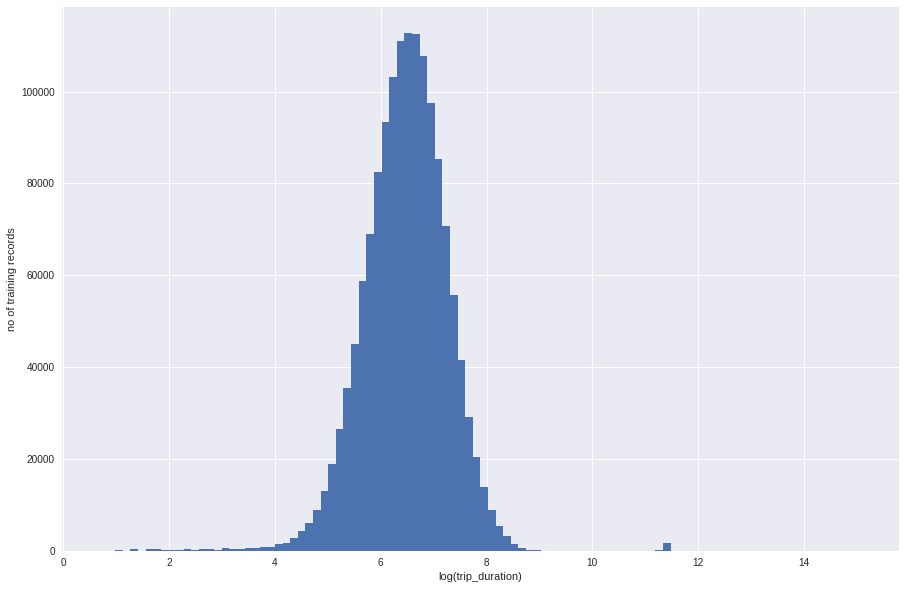

In [19]:
# data preprocessing
# average trip duration
df_train['log_trip_duration'] = np.log(df_train['trip_duration'].values+1)
plt.hist(df_train['log_trip_duration'].values, bins =  100)
plt.xlabel('log(trip_duration)')
plt.ylabel('no of training records')
plt.show()

In [15]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

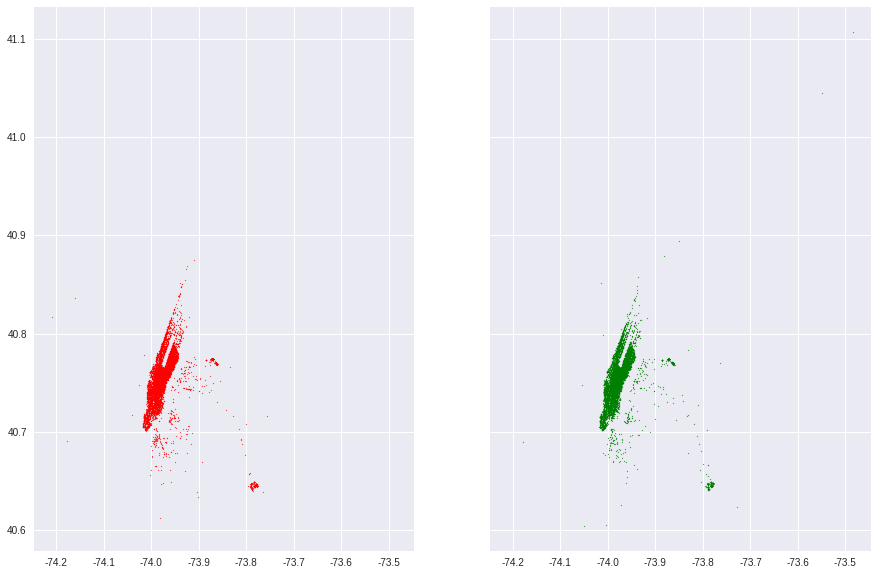

In [30]:
N= 10000
city_long_border = (-75,-75)
city_lat_border = (40,40)
fig, ax = plt.subplots(ncols =2, sharex =True, sharey = True)
ax[0].scatter(df_train['pickup_longitude'].values[:N], df_train['pickup_latitude'].values[:N], color = 'red', s= 1, alpha = 0.6)
ax[1].scatter(df_test['pickup_longitude'].values[:N], df_test['pickup_latitude'].values[:N], color = 'green', s= 1, alpha = 0.6)



In [0]:
#train model
from sklearn.model_selection import train_test_split
features_names = list(df_train.columns)
y = np.log(df_train['trip_duration'].values+1)
x_train, y_train, x_test, y_test= train_test_split(df_train[features_names].values, y, test_size = 0.2, random_state = 1998)




In [34]:
!pip install xgboost

In [0]:
import xgboost as xgb
import seaborn as sns


In [42]:
model = xgb.train('default', df_train)

TypeError: ignored